In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Dimensionality Reduction

Many Machine Learning problems involve thousands or even millions of features(columns) for
 each training instanc(row)e. Not only do all these features make training extremely slow,
 but they can also make it much harder to find a good solution, as we will see. This
 problem is often referred to as the curse of dimensionality.

Fortunately, in real-world problems, it is often possible to reduce the number of fea
tures considerably, turning an intractable problem into a tractable one For example,
 consider the MNIST image, the pixels on the image bor
ders are almost always white, so you could completely drop these pixels from the
 training set without losing much information Additionally, two neighboring pix
els are often highly correlated: if you merge them into a single pixel (e.g., by taking
 the mean of the two pixel intensities), you will not lose much information..s .

#### Note
Reducing dimensionality does cause some information loss (just
 like compressing an image to JPEG can degrade its quality), so
 even though it will speed up training, it may make your system
 perform slightly worse. It also makes your pipelines a bit more
 complex and thus harder to maintain. So, if training is too slow,
 you should first try to train your system with the original data
 before considering using dimensionality reduction. In some cases,
 reducing the dimensionality of the training data may filter out
 some noise and unnecessary details and thus result in higher per
formance, but in general it won’t; it will just speed up training.

#### Information
Dimensionality reduction is also extremely useful  for data visualizatio. Reducing the number of dimensions down to two
 (or three) makes it possible to plot a condensed view of a high-dimensional trainin set on a graph and often gain some important insights by visually detecting patterns,  such as clusters. Moreover, DataViz is essential to communicate your conclusions t 
 people who are not data scientists—in particular, decision makers who will use yo 
 results.gn

## The Curse of Dimensionality

#### Important
In higher dimensions you have plenty of space, As a
 result, high-dimensional datasets are at risk of being very sparse: most training
 instances are likely to be far away from each other. This also means that a new
 instance will likely be far away from any training instance, making predictions much
 less reliable than in lower dimensions, since they will be based on much larger extrap
olations. In short, the more dimensions the training set has, the greater the risk of
 overfitt.ing it

In [2]:
# EXTRA
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

# Main Approaches for Dimensionality Reduction

## 1) Projection

In most real-world problems, training instances are not spread out uniformly across  all dimensions. Many features are almost constant, while others are highly correlate.  As a result, all training instances lie within (or close
 to) a much lower-dimensional subspace of the high-dimensional space.d

### IMPORTANT Read Projection section from book

## 2) Manifold Learning

The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a 2D
 shape that can be bent and twisted in a higher-dimensional space. More generally, a
 d-dimensional manifold is a part of an n-dimensional space (where d < n) that locally
 resembles a d-dimensional hyperplane. In the case of the Swiss roll, d = 2 and n = 3: it
 locally resembles a 2D plane, but it is rolled in the third dimension.

#### Important
Many dimensionality reduction algorithms work by modeling the manifold on which
 the training instances lie; this is called Manifold Learning. It relies on the manifold
 assumption, also called the manifold hypothesis, which holds that most real-world
 high-dimensional datasets lie close to a much lower-dimensional manifold. This
 assumption is very often empirically observed.

#### IMPORTANT
Once again, think about the MNIST dataset: all handwritten digit images have some
 similarities. They are made of connected lines, the borders are white, and they are
 more or less centered. If you randomly generated images, only a ridiculously tiny
 fraction of them would look like handwritten digits. In other words, the degrees of
 freedom available to you if you try to create a digit image are dramatically lower than
 the degrees of freedom you would have if you were allowed to generate any image
 you w What this means is that you are restricted or bounded more tightly when you have to creat an image that actually represents an image compared to when you want to creat any image that does not make sense, when you have to create an image that does not make sense, you are much more free and thus have more degrees of freedom.anted. These constraints tend to squeeze the dataset into a lower-dimensional
 manifold.

#### NOTE

Read the following paragraph and next one from book.
The manifold assumption is often accompanied by another implicit assumption: that
 the task at hand (e.g., classification or regression) will be simpler if expressed in the
 lower-dimensional space of the manifold. 

 In short, reducing the dimensionality of your training set before training a model will
 usually speed up training, but it may not always lead to a better or simpler solution; it
 all depends on the dataset.

# PCA

## IMPORTANT DEFINITON
Principal Component Analysis (PCA) is by far the most popular dimensionality reduc
tion algorithm. First it identifies the hyperplane that lies closest to the data, and then
 it projects the data onto it

## Preserving the Variance

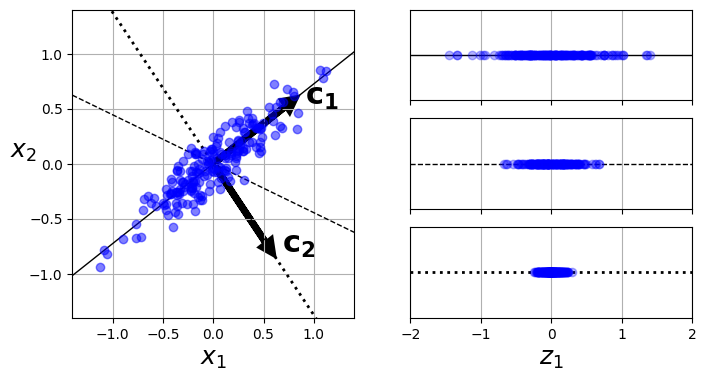

In [3]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)


plt.show()

In the above plots you can see a simple 2D dataset is repre
sented on the lef, along with three different axes (i.e., 1D hyperplanes).
 On the right is the result of the projection of the dataset onto each of these axes. As
 you can see, the projection onto the solid line preserves the maximum variance, while
 the projection onto the dotted line preserves very little variance and the projection
 onto the dashed line preserves an intermediate amount of variance. 

### Important
It seems reasonable to select the axis that preserves the maximum amount of var
iance, as it will most likely lose less information than the other projections. Another
 way to justify this choice is that it is the axis that minimizes the mean squared dis
tance between the original dataset and its projection onto that axis. This is the rather
 simple idea behind PCA.

## Principal Components (IMPORTANT)

PCA identifies the axis that accounts for the largest amount of variance in the train
ing set In the above figure, it is the solid line. It also finds a second axis, orthogonal to the
 first one, that accounts for the largest amount of remaining variance. In this 2D
 example there is no choice: it is the dotted line. If it were a higher-dimensional data
set, PCA would also find a third axis, orthogonal to both previous axes, and a fourth,
 a fifth, and so on—as many axes as the number of dimensions in the dataset..

The ith axis is called the ith principal component (PC) of the data. In the above figure, the  first PC is the axis on which vector c 
 lies, and the second PC is the axis on whi 
 vector 2
 lies.

### Singular Value Decomposition (SVD)

SVD is a  standard matrix factorization techniqu that can decompose the training set matrix X into the matrix multiplication of three
 matrices U Σ V⊺, where V contains the unit vectors that define all the principal co
ponents that we are looking fore

### NOTE
 PCA assumes that the dataset is centered around the origin. As we
 will see, Scikit-Learn’s PCA classes take care of centering the data
 for you. If you implement PCA yourself (as in the preceding exam
ple), or if you use other libraries, don’t forget to center the data
 first.

In [4]:
X

array([[ 6.97858011e-01,  5.60979108e-01],
       [ 1.48567399e-01, -1.22399832e-01],
       [-9.13536753e-02, -1.10222952e-01],
       [ 3.38454277e-03, -7.50425316e-02],
       [ 1.03253504e-02, -5.14855864e-02],
       [-5.83466256e-01, -3.14567709e-01],
       [ 2.56014453e-01,  3.97320240e-01],
       [ 4.40253750e-02, -1.80345721e-02],
       [-1.29703077e-01, -2.85389910e-01],
       [ 4.62095106e-01,  1.99632303e-01],
       [-4.67273592e-01, -3.64913862e-01],
       [ 5.87245805e-01,  4.55918791e-01],
       [-3.72221100e-01, -3.58565265e-01],
       [ 2.62351640e-01,  1.70769081e-01],
       [-2.97479970e-01, -2.44565210e-01],
       [ 1.85228713e-01,  3.78837263e-01],
       [-4.66438596e-01, -4.16316865e-01],
       [-1.82940074e-01, -4.31928868e-01],
       [-3.13499815e-01, -3.54328952e-01],
       [ 4.62412359e-01,  3.19656748e-01],
       [-6.94643386e-01, -4.24754480e-01],
       [-4.16552901e-02, -2.45728421e-01],
       [-2.06753140e-01, -2.22969216e-01],
       [-3.

In [5]:
X.mean(axis=0)

array([-5.66675432e-06, -1.73259250e-03])

The following Python code uses NumPy’s svd() function to obtain all the principal
 components of the training set, then extracts the two unit vectors that define the first
 two PCs:

In [6]:
X_centered = X - X.mean(axis=0)

In [7]:
U, s, Vt = np.linalg.svd(X_centered)

In [8]:
U

array([[-1.28696841e-01,  1.70499937e-02,  1.75581278e-02, ...,
         1.20755995e-03, -1.43097923e-01, -1.22471743e-02],
       [-6.51468507e-03, -1.21204677e-01, -2.23526181e-02, ...,
         7.21638368e-02,  4.60716516e-02, -6.15686966e-02],
       [ 1.98712458e-02, -2.03149388e-02,  9.99283237e-01, ...,
         1.44962224e-03,  3.07359168e-03, -1.06930801e-03],
       ...,
       [-6.58356322e-03,  7.18524997e-02,  1.38331359e-03, ...,
         9.95345592e-01, -2.50313260e-03,  4.00756338e-03],
       [-1.47268374e-01,  3.02983883e-02,  3.19604139e-03, ...,
        -3.03512352e-03,  9.79963172e-01,  1.17838588e-03],
       [-5.53729158e-03, -6.25173544e-02, -9.99887313e-04, ...,
         3.96608606e-03,  6.98021789e-04,  9.96473223e-01]])

In [9]:
s

array([6.96278267, 1.53417231])

In [10]:
Vt

array([[-0.79644131, -0.60471583],
       [-0.60471583,  0.79644131]])

In [11]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [12]:
c1

array([-0.79644131, -0.60471583])

In [13]:
c2

array([-0.60471583,  0.79644131])

## Projecting Down to d Dimensions

Once you have identified all the principal components, you can reduce the dimen
sionality of the dataset down to d dimensions by projecting it onto the hyperplane
 defined by the first d principal components. Selecting this hyperplane ensures that the
 projection will preserve as much variance as possible.

### Important
To project the training set onto the hyperplane and obtain a reduced dataset Xd-proj
 of
 dimensionality d, compute the matrix multiplication of the training set matrix X by
 the matrix Wd
 , defined as the matrix containing the first d columns 

 The equation is
  Xd‐proj = XWd (better see in book)of V

The following Python code projects the training set onto the plane defined by the first  two principal components:

In [14]:
W2 = Vt.T[:, :2]

In [15]:
W2

array([[-0.79644131, -0.60471583],
       [-0.60471583,  0.79644131]])

In [16]:
X2D = X_centered.dot(W2)

In [17]:
X2D

array([[-8.96088137e-01,  2.61576283e-02],
       [-4.53603363e-02, -1.85948860e-01],
       [ 1.38359166e-01, -3.11666166e-02],
       [ 4.16315780e-02, -6.04371773e-02],
       [ 2.18583744e-02, -4.58726693e-02],
       [ 6.53868464e-01,  1.03673047e-01],
       [-4.45218566e-01,  1.63002740e-01],
       [-2.52100754e-02, -3.96098381e-02],
       [ 2.74828447e-01, -1.47486328e-01],
       [-4.89804685e-01, -1.19064333e-01],
       [ 5.91772943e-01, -6.68825324e-03],
       [-7.44460369e-01,  9.37220434e-03],
       [ 5.12230114e-01, -5.91117152e-02],
       [-3.13266691e-01, -2.12641588e-02],
       [ 3.83765553e-01, -1.35145070e-02],
       [-3.77664930e-01,  1.91087392e-01],
       [ 6.22192127e-01, -4.81326634e-02],
       [ 4.05843018e-01, -2.32002753e-01],
       [ 4.62900292e-01, -9.12474313e-02],
       [-5.62638042e-01, -2.36637544e-02],
       [ 8.09046208e-01,  8.31463215e-02],
       [ 1.80719622e-01, -1.69142171e-01],
       [ 2.98447518e-01, -5.11785151e-02],
       [ 4.

## Using Scikit-Learn

Scikit-Learn’s PCA class uses SVD decomposition to implement PCA, just like we did
 earlier in this chapter. The following code applies PCA to reduce the dimensionality
 of the dataset down to two dimensions (note that it automatically takes care of center
ing the data):

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components = 2)
pca.fit_transform(X)

array([[-8.96088137e-01, -2.61576283e-02],
       [-4.53603363e-02,  1.85948860e-01],
       [ 1.38359166e-01,  3.11666166e-02],
       [ 4.16315780e-02,  6.04371773e-02],
       [ 2.18583744e-02,  4.58726693e-02],
       [ 6.53868464e-01, -1.03673047e-01],
       [-4.45218566e-01, -1.63002740e-01],
       [-2.52100754e-02,  3.96098381e-02],
       [ 2.74828447e-01,  1.47486328e-01],
       [-4.89804685e-01,  1.19064333e-01],
       [ 5.91772943e-01,  6.68825324e-03],
       [-7.44460369e-01, -9.37220434e-03],
       [ 5.12230114e-01,  5.91117152e-02],
       [-3.13266691e-01,  2.12641588e-02],
       [ 3.83765553e-01,  1.35145070e-02],
       [-3.77664930e-01, -1.91087392e-01],
       [ 6.22192127e-01,  4.81326634e-02],
       [ 4.05843018e-01,  2.32002753e-01],
       [ 4.62900292e-01,  9.12474313e-02],
       [-5.62638042e-01,  2.36637544e-02],
       [ 8.09046208e-01, -8.31463215e-02],
       [ 1.80719622e-01,  1.69142171e-01],
       [ 2.98447518e-01,  5.11785151e-02],
       [ 4.

#### NOTE
After fitting the PCA transformer to the dataset, its components_ attribute holds the
 transpose of Wd
 (e.g., the unit vector that defines the first principal component is
 equal to pca.components_.T[:, 0]).

## Explained Variance Ratio

 Another useful piece of information is the explained variance ratio of each principal
 component, available via the explained_variance_ratio_ variable. The ratio indi
cates the proportion of the dataset’s variance that lies along each principal compo
nent.

In [20]:
pca.explained_variance_ratio_

array([0.95369864, 0.04630136])

#### Important Note
This output tells you that 95.3% of the dataset’s variance lies along the first PC, and
44.6% lies along the second PC. This leaves less than0112% for the third PC, so it is
 reasonable to assume that the third PC probably carries little information.

## Choosing the Right Number of Dimensions

Instead of arbitrarily choosing the number of dimensions to reduce down to, it is
 simpler to choose the number of dimensions that add up to a sufficiently large por
tion of the variance (e.g., 95%). Unless, of course, you are reducing dimensionality for
 data visualization—in that case you will want to reduce the dimensionality down to 2
 or 3.

In [21]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

C:\Python 3.11\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [23]:
X_train.shape

(52500, 784)

The following code performs PCA without reducing dimensionality, then computes
 the minimum number of dimensions required to preserve 95% of the training set’s
 variance: You could then set n_components=d and run PCA again.

In [24]:
pca = PCA()
pca.fit(X)


PCA()

In [25]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_)
print(cumsum)
print(len(cumsum))

[9.74611592e-02 7.15544459e-02 6.14953098e-02 5.40338453e-02
 4.88893370e-02 4.30522703e-02 3.27826152e-02 2.88964157e-02
 2.75836420e-02 2.34214017e-02 2.10668855e-02 2.03755324e-02
 1.70706430e-02 1.69401978e-02 1.58338224e-02 1.48634490e-02
 1.31935849e-02 1.27901425e-02 1.18727249e-02 1.15293670e-02
 1.06603978e-02 1.00979434e-02 9.59151230e-03 9.09635078e-03
 8.83286819e-03 8.38818208e-03 8.09831794e-03 7.85717898e-03
 7.40262230e-03 6.90014160e-03 6.56143991e-03 6.45470291e-03
 6.00819302e-03 5.85611746e-03 5.66753559e-03 5.43470659e-03
 5.04717070e-03 4.87079420e-03 4.78955138e-03 4.67593650e-03
 4.54368629e-03 4.44918011e-03 4.18216598e-03 3.96163907e-03
 3.83707746e-03 3.75784804e-03 3.61426284e-03 3.49024600e-03
 3.38731603e-03 3.19696169e-03 3.16854028e-03 3.10144912e-03
 2.96480352e-03 2.87101448e-03 2.82513796e-03 2.69422713e-03
 2.68392305e-03 2.56509337e-03 2.53167853e-03 2.44648029e-03
 2.39702237e-03 2.38581001e-03 2.29233749e-03 2.20948989e-03
 2.13060474e-03 2.063174

In [26]:
d = np.argmax(cumsum >= 0.95) + 1 # Here np.argmax gives the index corresponding to the first occurrence of the value
d

154

But there is a much better
 option: instead of specifying the number of principal components you want to pre
serve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio
 of variance you wish to preserve:

In [27]:
pca = PCA(n_components=0.95)

In [28]:
X_reduced = pca.fit_transform(X)
X_reduced

array([[ 122.25525533, -316.23384391,  -51.13183087, ...,   34.71703473,
         -14.22575676,   21.38272145],
       [1010.49400346, -289.96362059,  576.1207452 , ...,   23.87884359,
          -6.54283564,  -24.90277545],
       [ -58.99594719,  393.69744499, -161.99818411, ...,   -5.36282742,
          55.00020853,  -96.73397123],
       ...,
       [-271.50701323,  590.07850009,  341.36886918, ...,  -43.7571469 ,
          35.78216024,   49.96612771],
       [-310.22482291, -116.72715081,  635.71999693, ...,  -21.86345345,
          20.40152778,  -42.68277473],
       [1058.86212574,  -83.39253843,  731.34218396, ...,   41.22834049,
         -20.05206663,  -49.92361814]])

In [29]:
X_reduced.shape

(70000, 154)

#### Note
Yet another option is to plot the explained variance as a function of the number of  dimensions (simply plot cumsum). There will usually be an elbow in the  curve, where the explained variance stops growing fast.;

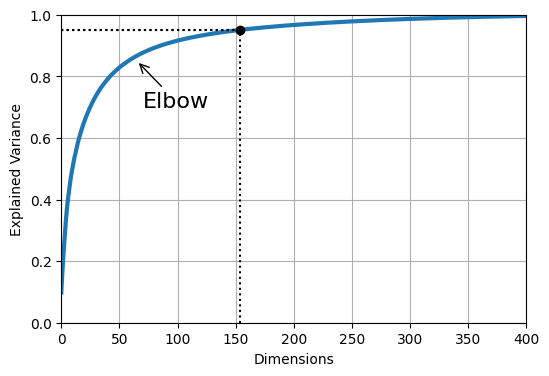

In [30]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot([d, 0], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

# Explanation of the plot code, 
# The line plt.plot([d, d], [0, 0.95], "k:"), here, the x coordinate is entire [d,d] and y coordinate is [0,0.95]. d here is 154, so the code works as follows
# first point is 154 on x with 0 on y axis and then second point is 154 on x with 0.95 on y axis and you join these two points using black dotted lines.
# The second plot is plt.plot([0,d],[0.95,0.95]), here, first point is 0 on x with 0.95 on y axis and then second point is 154 on x with 0.95 on y axis and you join these two points using black dotted lines.

## PCA for Compression

After applying PCA to the MNIST dataset while preserving 95% of its var
iance. You should find that each instance will have just over 150 features, instead of
 the original 784 features. So, while most of the variance is preserved, the dataset is
 now less than 20% of its original size! This is a reasonable compression ratio, and you
 can see how this size reduction can speed up a classification algorithm (such as an
 SVM classifier) tremendously.

It is also possible to decompress the reduced dataset back to 784 dimensions by
 applying the inverse transformation of the PCA projection. This won’t give you back
 the original data, since the projection lost a bit of information (within the 5% var
iance that was dropped), but it will likely be close to the original data. The mean
 squared distance between the original data and the reconstructed data (compressed
 and then decompressed) is called the reconstruction error.

 The following code compresses the MNIST dataset down to 154 dimensions, then
 uses the inverse_transform() method to decompress it back to 784 dimensions:

In [31]:
pca = PCA(n_components=0.95,svd_solver='full')
X_reduced = pca.fit_transform(X_train)
X_reduced

array([[1540.00356811,   31.93937218, -429.97321065, ...,  -84.65004104,
           6.74294682,   20.47482278],
       [-147.85255021,  195.96359846,  -88.79927091, ...,   15.71573594,
         -63.52459544,    7.75944697],
       [ 197.87826738,   73.97047035,  331.97279157, ...,  -23.3617457 ,
          36.31976347,   23.69626902],
       ...,
       [-388.19280532,  758.17127529,  286.00242737, ...,  -13.22716805,
         -17.03272723,  -47.12905142],
       [-392.25807025, -279.30961495,  -76.99133604, ...,   23.26272928,
          88.79718425,   40.25487363],
       [-184.53517546,  499.90421879, -543.43716389, ...,   64.58401628,
         -31.17769535,   52.65581497]])

In [32]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(52500, 784)

Below figure shows a few digits from the original training set (on the left), and the cor
responding digits after compression and decompression. You can see that there is a
 slight image quality loss, but the digits are still mostly intact.

Text(0.5, 1.0, 'Compressed')

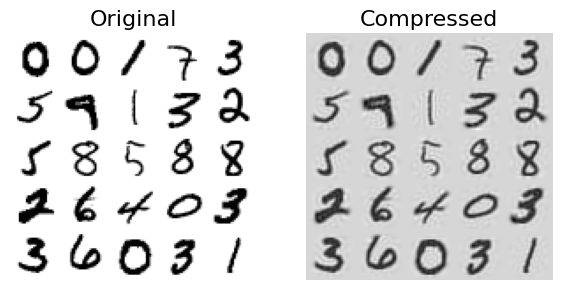

In [33]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

# Incremental PCA (IMPORTANT)

One problem with the preceding implementations of PCA is that they require the
 whole training set to fit in memory in order for the algorithm to run. Fortunately,
 Incremental PCA (IPCA) algorithms have been developed. They allow you to split the
 training set into mini-batches and feed an IPCA algorithm one mini-batch at a time.

This is useful for large training sets and for applying PCA online (i.e., on the fly, as
 new instances arrive).

### Important
The following code splits the MNIST dataset into 100 mini-batches (using NumPy’s
 array_split() function) and feeds them to Scikit-Learn’s IncrementalPCA class5 to
 reduce the dimensionality of the MNIST dataset down to 154 dimensions (just like
 before). Note that you must call the partial_fit() method with each mini-batch,
 rather than the fit() method with the whole training set:

In [34]:
from sklearn.decomposition import IncrementalPCA

In [35]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [36]:
X_reduced = inc_pca.transform(X_train)

### Important

Alternatively, you can use NumPy’s memmap class, which allows you to manipulate a
 large array stored in a binary file on disk as if it were entirely in memory; the class
 loads only the data it needs in memory, when it needs it. Since the IncrementalPCA
 class uses only a small part of the array at any given time, the memory usage remains
 under control. This makes it possible to call the usual fit() method, as you can see
 in the following code:

In [37]:
# X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
# batch_size = m // n_batches
# inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
# inc_pca.fit(X_mm)

## Kernerl PCA

 In Chapter 5 we discussed the kernel trick(Fortunately, when using SVMs you can apply an almost miraculous mathematical
 technique called the kernel trick. The kernel trick makes it
 possible to get the same result as if you had added many polynomial features, even
 with very high-degree polynomials, without actually having to add them. So there is
 no combinatorial explosion of the number of features because you don’t actually add
 any features.), a mathematical technique that implicitly
 maps instances into a very high-dimensional space (called the feature space), enabling
 nonlinear classification and regression with Support Vector Machines.

It turns out that the same trick can be applied to PCA, making it possible to perform  complex nonlinear projections for dimensionality reduction THIS IS CALLED KERNERL PCA. It is often good at preserving clusters of instances after projection, or
 sometimes even unrolling datasets that lie close to a twisted manifold..

In [38]:
from sklearn.decomposition import KernelPCA

In [39]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X_test)

### Selecting a Kernel and Tuning Hyperparameters

As kPCA is an unsupervised learning algorithm, there is no obvious performance
 measure to help you select the best kernel and hyperparameter values. That said,
 dimensionality reduction is often a preparation step for a supervised learning task
 (e.g., classification), so you can use grid search to select the kernel and hyperparame
ters that lead to the best performance on that task. The following code creates a two
step pipeline, first reducing dimensionality to two dimensions using kPCA, then
 applying Logistic Regression for classification. Then it uses GridSearchCV to find the
 best kernel and gamma value for kPCA in order to get the best classification accuracy
 at the end of the pipeline:

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [41]:
clf = Pipeline([
 ("kpca", KernelPCA(n_components=2)),
 ("log_reg", LogisticRegression())
 ])

In [44]:
param_grid = [{
 "kpca__gamma": np.linspace(0.03, 0.05, 10),
 "kpca__kernel": ["rbf", "sigmoid"]
 }]

In [46]:
# grid_search = GridSearchCV(clf, param_grid, cv=3)
# grid_search.fit(X_test, y_test)

The best kernel and hyperparameters are then available through the best_params_
 variable:

In [47]:
# grid_search.best_params_

##  LLE(Locally Linear Embedding)

It is a Manifold Learning technique that does not rely on
 projections, like the previous algorithms do. In a nutshell, LLE works by first measur
ing how each training instance linearly relates to its closest neighbors (c.n.), and then
 looking for a low-dimensional representation of the training set where these local
 relationships are best preserved (more details shortly). This approach makes it partic
ularly good at unrolling twisted manifolds, especially when there is not too much
 noise.

 The following code uses Scikit-Learn’s LocallyLinearEmbedding class to unroll the
 Swiss roll:

In [53]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

The Swiss role dataset plot

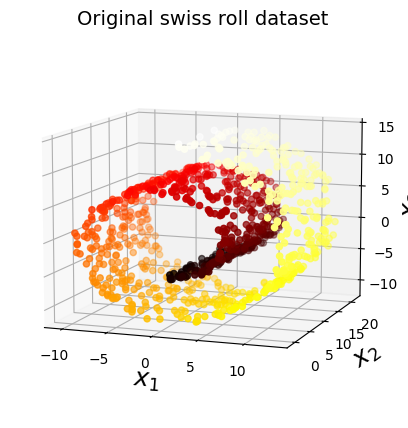

In [58]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
plt.title("Original swiss roll dataset", fontsize=14)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


plt.show()

In [50]:
from sklearn.manifold import LocallyLinearEmbedding

In [51]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

The resulting 2D dataset is shown in figure below. As you can see, the Swiss roll is
 completely unrolled, and the distances between instances are locally well preserved.
 However, distances are not preserved on a larger scale: the left part of the unrolled
 Swiss roll is stretched, while the right part is squeezed. Nevertheless, LLE did a pretty
 good job at modeling the manifold.

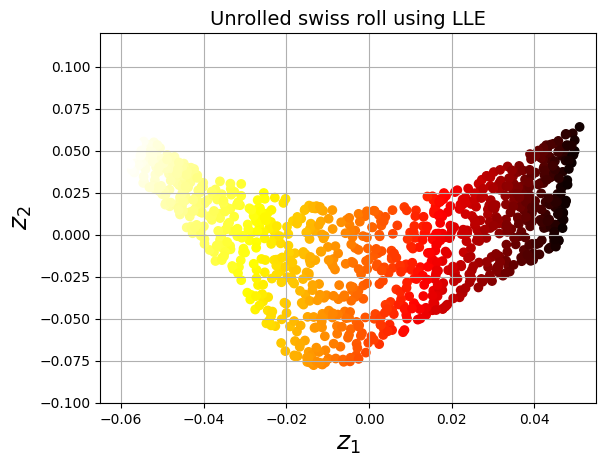

In [52]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)


plt.show()